Connected to Python 3.11.9

In [ ]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
import json
import pandas as pd

# ---------- 1.  LOAD DENSITY GRID ----------
data_flat        = np.load("C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/beta_glyph_parameter_buddha_array.npy")    # shape (H, W)
D = data_flat.reshape((5000, 5000))
#D = pd.read_csv('C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/')


H, W     = D.shape

# optional: drop pure-zero pixels to speed things up
ys, xs   = np.nonzero(D)
weights  = D[ys, xs].astype(float)
coords   = np.column_stack([xs, ys]).astype(float)   # pixel coords (x, y)


from sklearn.cluster import KMeans


# --------- 1. load + sparsify -----------

ys, xs = np.nonzero(D)
w      = D[ys, xs].astype(float)
coords = np.column_stack([xs, ys]).astype(np.float32)

# --------- 2. reservoir-style sampling -----------
# keep ≤ 200k points, but sample proportionally to weight
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]

# --------- 3. Mini-batch KMeans -----------
K = 180
mb = MiniBatchKMeans(
        n_clusters   = K,
        batch_size   = 10_000,
        n_init       = "auto",
        max_iter     = 500,
        random_state = 42
     )
mb.fit(coords_sample, sample_weight=w_sample)

centroids = mb.cluster_centers_.astype(int)   # K × 2  (x,y)

In [ ]:
centroids

array([[2925, 3761],
       [3061, 1259],
       [3685, 3223],
       [2643, 1372],
       [3569, 1559],
       [3260, 3586],
       [2765, 3502],
       [2849, 1094],
       [3191, 3742],
       [2944, 1867],
       [4306, 2359],
       [3152, 1254],
       [2691, 3764],
       [2670, 2500],
       [3270, 1391],
       [3738, 1813],
       [2782, 3122],
       [2914, 3969],
       [2855, 1220],
       [3010, 1113],
       [3461, 3427],
       [2718, 1609],
       [3145, 3775],
       [2613, 3539],
       [3686, 1646],
       [2973, 3496],
       [2906, 1387],
       [3404, 1427],
       [2709, 1340],
       [2977, 1004],
       [3004, 3891],
       [2812, 3850],
       [3295, 3032],
       [3220, 1293],
       [2668, 3636],
       [3149, 1160],
       [3112, 3706],
       [2888, 3247],
       [3082, 1713],
       [3057, 3731],
       [2760, 3626],
       [2764, 1180],
       [2697, 3350],
       [2845, 3589],
       [3556, 3306],
       [3189, 3634],
       [2946, 1209],
       [3584,

In [ ]:
keep   = 500_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]

# --------- 3. Mini-batch KMeans -----------
K = 180
mb = MiniBatchKMeans(
        n_clusters   = K,
        batch_size   = 10_000,
        n_init       = "auto",
        max_iter     = 500,
        random_state = 42
     )
mb.fit(coords_sample, sample_weight=w_sample)

centroids = mb.cluster_centers_.astype(int)   # K × 2  (x,y)


In [ ]:
keep   = 1_000_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]

# --------- 3. Mini-batch KMeans -----------
K = 180
mb = MiniBatchKMeans(
        n_clusters   = K,
        batch_size   = 50_000,
        n_init       = "auto",
        max_iter     = 500,
        random_state = 42
     )
mb.fit(coords_sample, sample_weight=w_sample)

centroids = mb.cluster_centers_.astype(int)   # K × 2  (x,y)




In [ ]:
centroids

array([[2694, 3764],
       [3374, 1542],
       [2785, 1255],
       [3335, 3573],
       [3682, 3253],
       [3152, 1291],
       [2930, 3121],
       [4278, 2456],
       [3055, 3843],
       [2867, 1662],
       [3790, 1690],
       [2734, 3426],
       [2987, 1046],
       [2587, 2384],
       [2944, 3524],
       [3140, 3719],
       [3630, 1714],
       [2803, 1478],
       [2731, 1340],
       [2831, 3876],
       [3508, 3384],
       [2944, 1234],
       [3253, 1353],
       [3050, 1863],
       [2635, 3612],
       [3581, 1575],
       [3159, 1177],
       [2566, 1306],
       [2982, 1416],
       [3204, 3631],
       [3035, 3305],
       [2597, 1430],
       [2790, 3625],
       [3048, 1144],
       [2662, 1582],
       [2990, 3696],
       [3252, 1260],
       [2963, 3910],
       [2850, 1112],
       [3450, 1452],
       [2745, 1741],
       [2943, 3757],
       [2572, 2586],
       [2830, 2003],
       [2706, 1270],
       [3351, 3028],
       [2839, 2966],
       [2732,

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 50_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)

    # Calculate the average silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
    

KeyboardInterrupt: 

In [ ]:
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 50_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
    

computing inertia
computing avg silhouette coefficient


KeyboardInterrupt: 

In [ ]:
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
    

computing inertia
computing avg silhouette coefficient


KeyboardInterrupt: 

In [ ]:
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels, sample_size=20_000)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
    

computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.74 for k = 2
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.62 for k = 3
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.51 for k = 4
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.53 for k = 5
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.42 for k = 6
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.40 for k = 7
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.44 for k = 8
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.44 for k = 9
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.45 for k = 10
computing inertia
computing avg silhouette coefficient
Average Silhouette Coeffic

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
trainingdata

[[2, 175799487430656.0, 0.7357509136199951],
 [3, 124986845036544.0, 0.6151031255722046],
 [4, 100392008417280.0, 0.5088742971420288],
 [5, 79723501715456.0, 0.5266786813735962],
 [6, 66453663383552.0, 0.4245779812335968],
 [7, 57852500639744.0, 0.3956349492073059],
 [8, 41729910636544.0, 0.44136595726013184],
 [9, 36475898953728.0, 0.4406137764453888],
 [10, 32938274062336.0, 0.44516924023628235],
 [11, 30979576037376.0, 0.4411953091621399],
 [12, 24808976809984.0, 0.43113887310028076],
 [13, 21413845008384.0, 0.4140186905860901],
 [14, 18038147514368.0, 0.4066403806209564],
 [15, 16586441228288.0, 0.39189332723617554],
 [16, 15641821052928.0, 0.38852906227111816],
 [17, 14673543954432.0, 0.3941934108734131],
 [18, 13402048036864.0, 0.3688321113586426],
 [19, 12547255173120.0, 0.37516093254089355],
 [20, 11781785255936.0, 0.3680057227611542],
 [21, 11485673684992.0, 0.3994036614894867],
 [22, 10865547935744.0, 0.3965007960796356],
 [23, 10131038273536.0, 0.40167996287345886],
 [24, 96

In [ ]:
traningdf = pd.DataFrame(trainingdata)

In [ ]:
traningdf

,0,1,2
0,2,1.757995e+14,0.735751
1,3,1.249868e+14,0.615103
2,4,1.003920e+14,0.508874
3,5,7.972350e+13,0.526679
4,6,6.645366e+13,0.424578
...,...,...,...
173,175,1.360197e+12,0.317498
174,176,1.356906e+12,0.314862
175,177,1.352314e+12,0.311535
176,178,1.335900e+12,0.315933


In [ ]:
traningdf

,0,1,2
0,2,1.757995e+14,0.735751
1,3,1.249868e+14,0.615103
2,4,1.003920e+14,0.508874
3,5,7.972350e+13,0.526679
4,6,6.645366e+13,0.424578
...,...,...,...
173,175,1.360197e+12,0.317498
174,176,1.356906e+12,0.314862
175,177,1.352314e+12,0.311535
176,178,1.335900e+12,0.315933


In [ ]:
trainingdf = traningdf

In [ ]:
coords

array([[4094.,    0.],
       [4215.,    0.],
       [4334.,    0.],
       ...,
       [4094., 4999.],
       [4334., 4999.],
       [4338., 4999.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(coords)

array([[ 1.2138661, -2.8249938],
       [ 1.4256451, -2.8249938],
       [ 1.6339235, -2.8249938],
       ...,
       [ 1.2138661,  2.841205 ],
       [ 1.6339235,  2.841205 ],
       [ 1.6409245,  2.841205 ]], dtype=float32)

In [ ]:
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels, sample_size=20_000)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
    

computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.73 for k = 2
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.61 for k = 3
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.58 for k = 4
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.53 for k = 5
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.45 for k = 6
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.46 for k = 7
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.47 for k = 8
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.45 for k = 9
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.43 for k = 10
computing inertia
computing avg silhouette coefficient
Average Silhouette Coeffic

In [ ]:
trainigndf = pd.DataFrame(trainingdata)

In [ ]:
trainigndf

,0,1,2
0,2,1.759778e+14,0.734427
1,3,1.253937e+14,0.605823
2,4,1.031217e+14,0.581213
3,5,7.696756e+13,0.532112
4,6,6.705679e+13,0.451763
...,...,...,...
173,175,1.332626e+12,0.316867
174,176,1.331742e+12,0.323073
175,177,1.326817e+12,0.323585
176,178,1.316573e+12,0.320782


In [ ]:
traningdf.columns =['K', 'Inertia','Avg Silhouette Coeff']

In [ ]:
traningdf

,K,Inertia,Avg Silhouette Coeff
0,2,1.757995e+14,0.735751
1,3,1.249868e+14,0.615103
2,4,1.003920e+14,0.508874
3,5,7.972350e+13,0.526679
4,6,6.645366e+13,0.424578
...,...,...,...
173,175,1.360197e+12,0.317498
174,176,1.356906e+12,0.314862
175,177,1.352314e+12,0.311535
176,178,1.335900e+12,0.315933


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalermm = MinMaxScaler()

In [ ]:
traningdf['min_max_inertia'] = scalermm.fit_transform(trainingdf['Inertia'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
traningdf['min_max_inertia'] = scalermm.fit_transform(trainingdf[['Inertia']])

In [ ]:
trainigndf

,0,1,2
0,2,1.759778e+14,0.734427
1,3,1.253937e+14,0.605823
2,4,1.031217e+14,0.581213
3,5,7.696756e+13,0.532112
4,6,6.705679e+13,0.451763
...,...,...,...
173,175,1.332626e+12,0.316867
174,176,1.331742e+12,0.323073
175,177,1.326817e+12,0.323585
176,178,1.316573e+12,0.320782


In [ ]:
trainingdf['min_max_inertia'] = scalermm.fit_transform(trainingdf[['Inertia']])

In [ ]:
trainigndf

,0,1,2
0,2,1.759778e+14,0.734427
1,3,1.253937e+14,0.605823
2,4,1.031217e+14,0.581213
3,5,7.696756e+13,0.532112
4,6,6.705679e+13,0.451763
...,...,...,...
173,175,1.332626e+12,0.316867
174,176,1.331742e+12,0.323073
175,177,1.326817e+12,0.323585
176,178,1.316573e+12,0.320782


In [ ]:
trainigndf

,0,1,2
0,2,1.759778e+14,0.734427
1,3,1.253937e+14,0.605823
2,4,1.031217e+14,0.581213
3,5,7.696756e+13,0.532112
4,6,6.705679e+13,0.451763
...,...,...,...
173,175,1.332626e+12,0.316867
174,176,1.331742e+12,0.323073
175,177,1.326817e+12,0.323585
176,178,1.316573e+12,0.320782


In [ ]:
trainingdf['min_max_inertia'] = scalermm.fit_transform(trainingdf[['Inertia']])

In [ ]:
trainingdf

,K,Inertia,Avg Silhouette Coeff,min_max_inertia
0,2,1.757995e+14,0.735751,1.000000
1,3,1.249868e+14,0.615103,0.708749
2,4,1.003920e+14,0.508874,0.567775
3,5,7.972350e+13,0.526679,0.449306
4,6,6.645366e+13,0.424578,0.373246
...,...,...,...,...
173,175,1.360197e+12,0.317498,0.000139
174,176,1.356906e+12,0.314862,0.000120
175,177,1.352314e+12,0.311535,0.000094
176,178,1.335900e+12,0.315933,0.000000


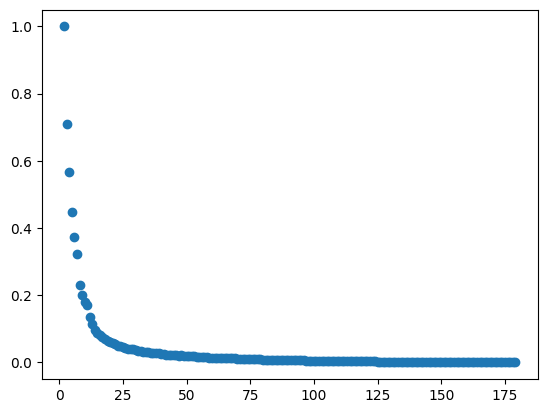

In [ ]:
plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])

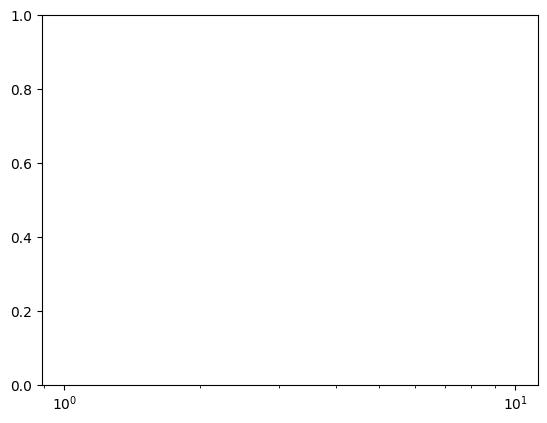

In [ ]:
plt.xscale('log')

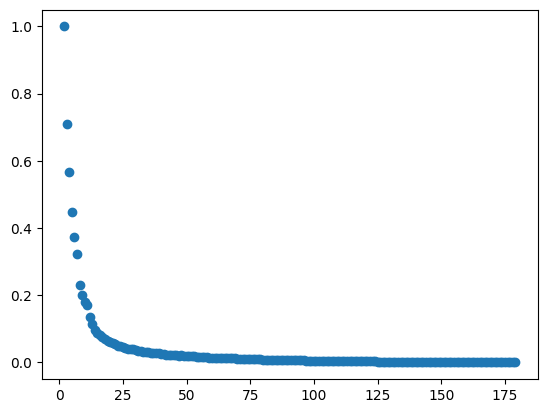

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])

In [ ]:
fig.xscale('log')

AttributeError: 'PathCollection' object has no attribute 'xscale'

AttributeError: 'PathCollection' object has no attribute 'show'

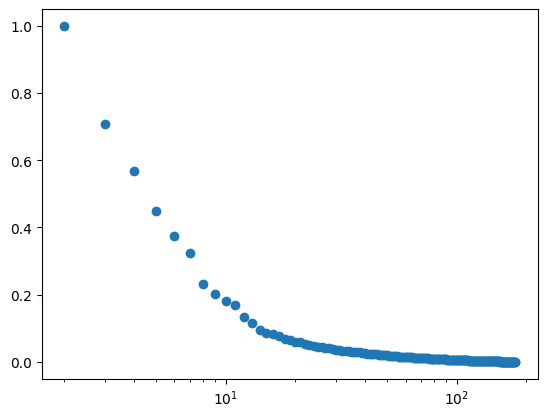

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.xscale('log')
fig.show()


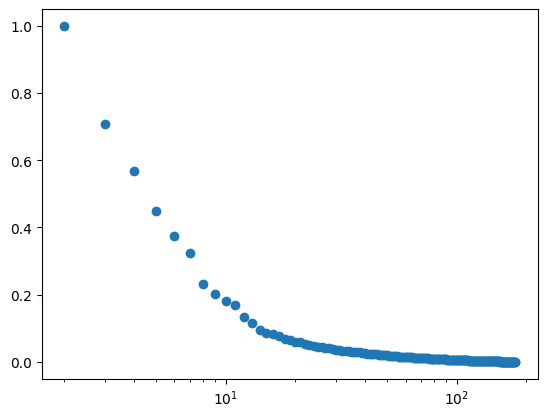

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.xscale('log')




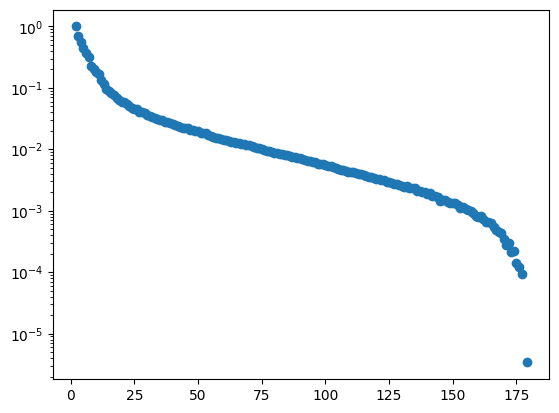

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.yscale('log')






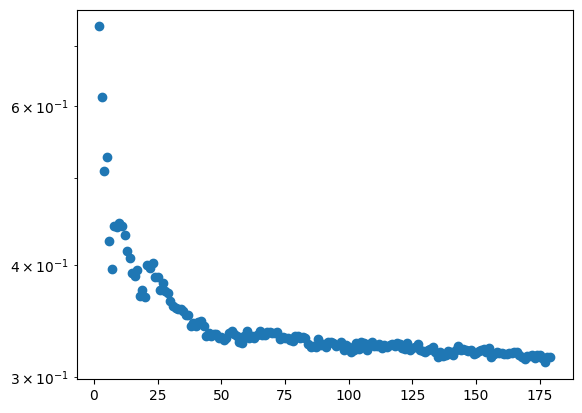

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.yscale('log')








AttributeError: 'NoneType' object has no attribute 'title'

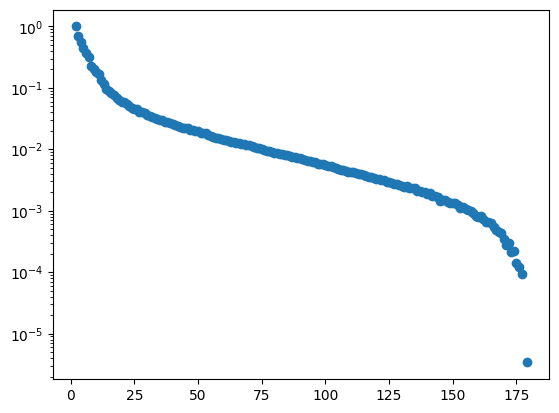

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.yscale('log').title('Min Max Inertia vs. K')



AttributeError: PathCollection.set() got an unexpected keyword argument 'labels'

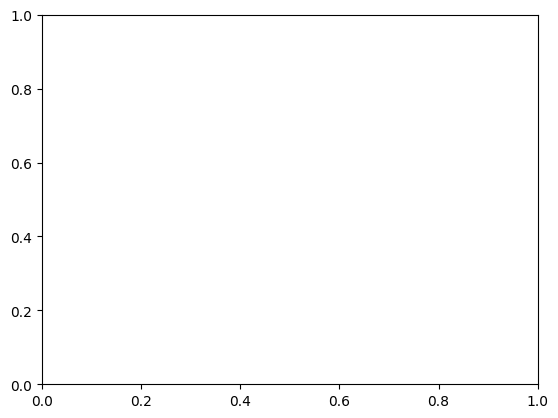

In [ ]:
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'],
                  labels = ['K', 'Min Max Inertia'])
plt.yscale('log')



TypeError: imshow() missing 1 required positional argument: 'X'

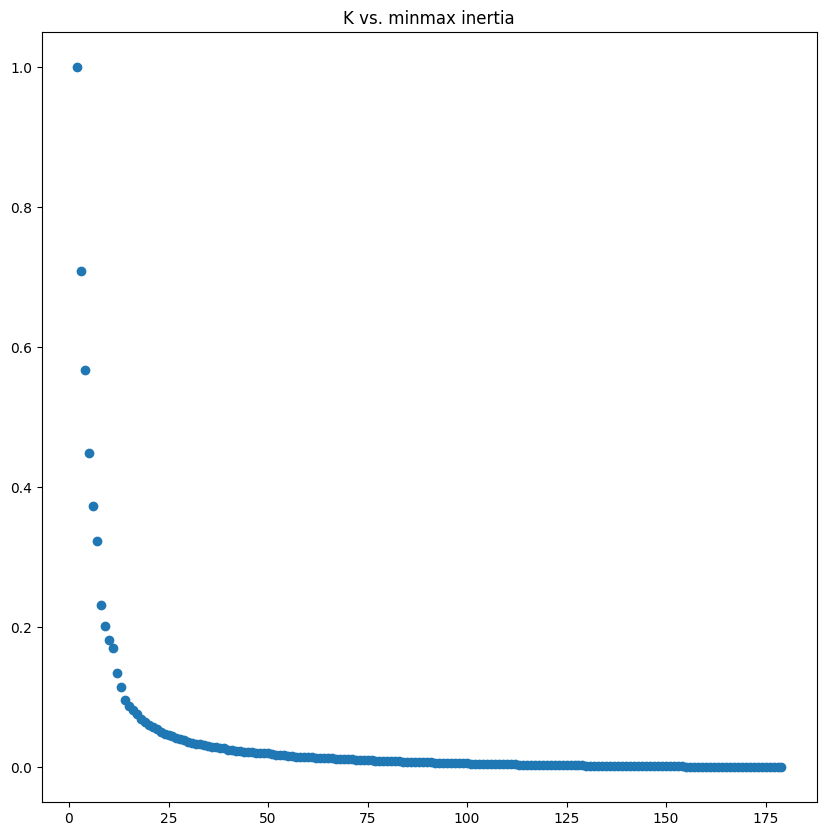

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
plt.imshow()
plt.imsave("data/minmaxinertia.png")
plt.close()
plt.yscale('log')



TypeError: imsave() missing 1 required positional argument: 'arr'

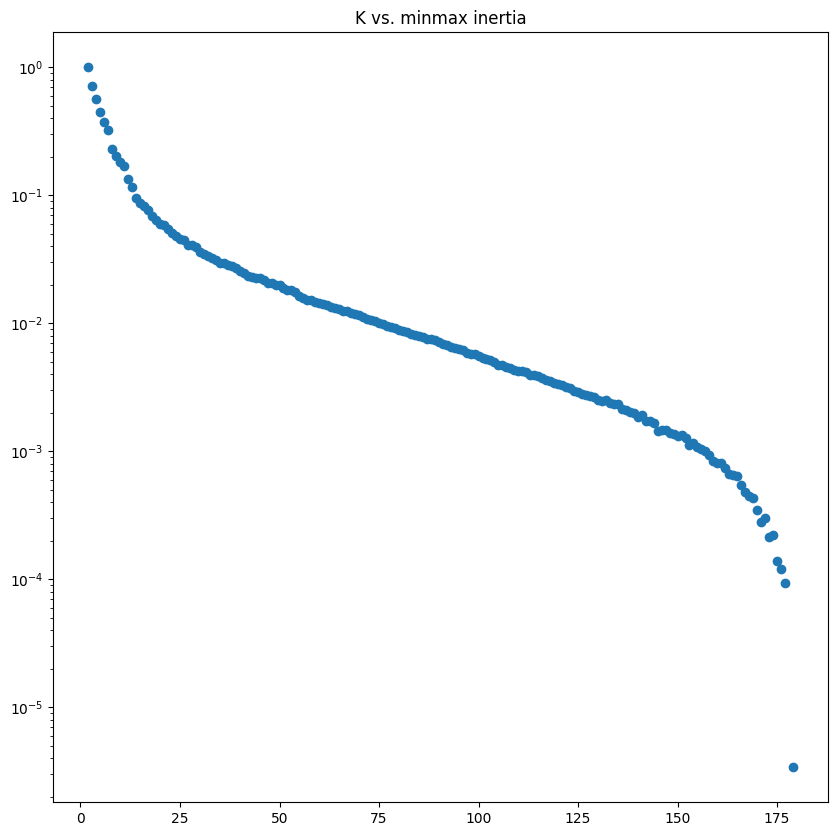

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
plt.yscale('log')
plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()



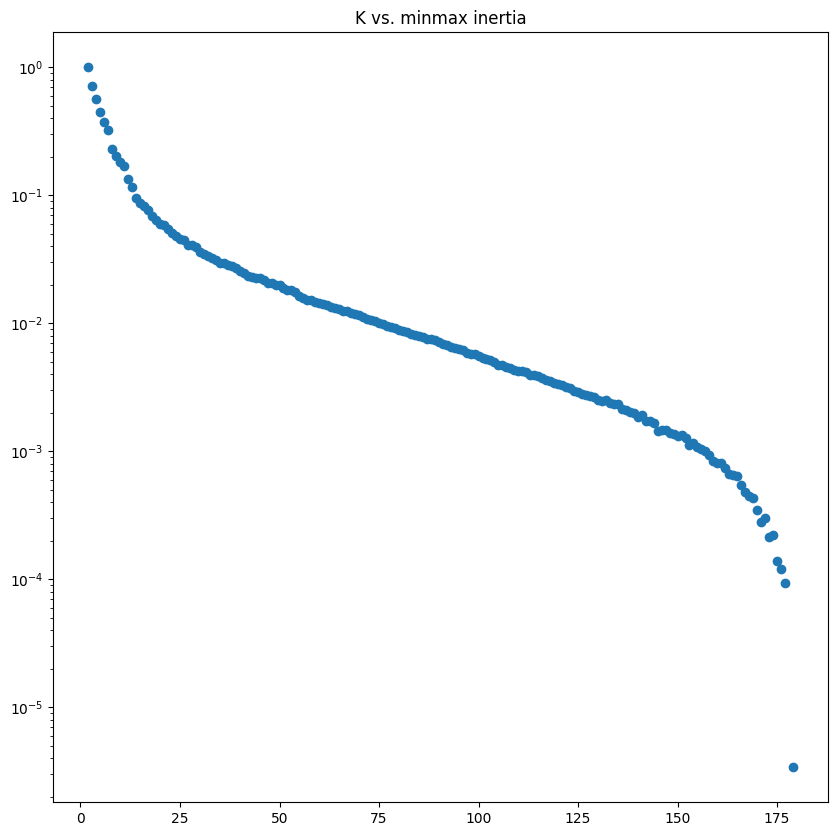

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
plt.yscale('log')
#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()



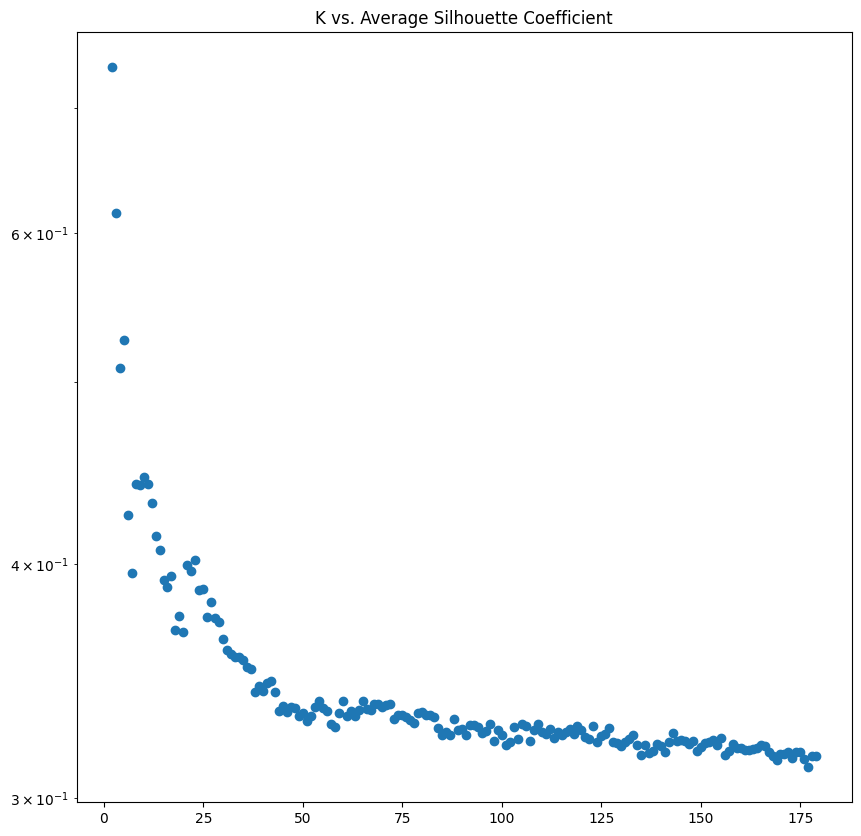

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.title("K vs. Average Silhouette Coefficient")
plt.yscale('log')
#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()



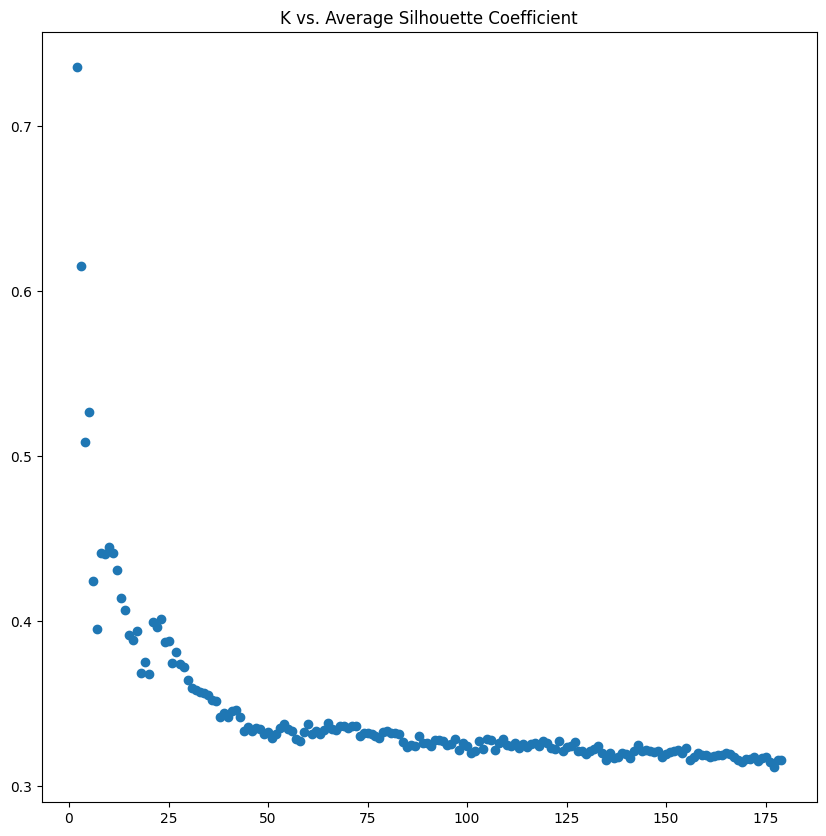

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.title("K vs. Average Silhouette Coefficient")

#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()



In [ ]:

keep   = 1_000_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)

km = KMeans(n_clusters=25,
            n_init='auto',
            max_iter=10000,
            random_state=952380952380)
km.fit(coords, sample_weight= w)

inertia = km.inertia_
labels = km.fit_predict(coords_sample)

centroids = km.cluster_centers_.astype(int)   # K × 2  (x,y)



InvalidParameterError: The 'random_state' parameter of KMeans must be an int in the range [0, 4294967295], an instance of 'numpy.random.mtrand.RandomState' or None. Got 952380952380 instead.

In [ ]:

km = KMeans(n_clusters=25,
            n_init='auto',
            max_iter=10000,
            random_state=952380)
km.fit(coords, sample_weight= w)

inertia = km.inertia_
labels = km.fit_predict(coords_sample)

centroids = km.cluster_centers_.astype(int)   # K × 2  (x,y)

In [ ]:
centroids

array([[2618, 2498],
       [3305, 1390],
       [3007, 3404],
       [2955, 1355],
       [4279, 2502],
       [2888, 3640],
       [3420, 3446],
       [3221, 1905],
       [2883, 3859],
       [3700, 1720],
       [2754, 1584],
       [3194, 3664],
       [2863, 1893],
       [3152, 1251],
       [3670, 3252],
       [2858, 3118],
       [2734, 3426],
       [3491, 1564],
       [2804, 1223],
       [2976, 1102],
       [3199, 3095],
       [2659, 3668],
       [3025, 1603],
       [3063, 3776],
       [2646, 1364]])

In [ ]:
imgmtx = np.zeros((4000,4000))

In [ ]:
imgmtx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
imgmtx[centroids] = 3

IndexError: index 4279 is out of bounds for axis 0 with size 4000

In [ ]:
imgmtx = np.zeros((5000,5000))

In [ ]:
imgmtx[centroids] = 3

In [ ]:
centroids

array([[2618, 2498],
       [3305, 1390],
       [3007, 3404],
       [2955, 1355],
       [4279, 2502],
       [2888, 3640],
       [3420, 3446],
       [3221, 1905],
       [2883, 3859],
       [3700, 1720],
       [2754, 1584],
       [3194, 3664],
       [2863, 1893],
       [3152, 1251],
       [3670, 3252],
       [2858, 3118],
       [2734, 3426],
       [3491, 1564],
       [2804, 1223],
       [2976, 1102],
       [3199, 3095],
       [2659, 3668],
       [3025, 1603],
       [3063, 3776],
       [2646, 1364]])

In [ ]:
import os

In [ ]:
os.getcwd()

'c:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering'

In [ ]:
np.save('centroids.npy', centroids)

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'
out_png   = 'overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'
out_png   = 'overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'glyph_buddhaP1_X0.0_Y0.0_erad3.95_lim1e+20.png'
out_png   = 'overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP1_X0.0_Y0.0_erad3.95_lim1e+20.png'

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP1_X0.0_Y0.0_erad3.95_lim1e+20.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP1_X0.0_Y0.0_erad3.95_lim1e+20.png'

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e+20.png'

In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dougm\\OneDrive\\Documents\\code\\anun\\parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png'

In [ ]:
import os, glob
folder = r"C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering"
print(any("glyph_buddha" in f for f in os.listdir(folder)))
print(glob.glob(folder + "/glyph_buddha*.png"))

True
['C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png']


In [ ]:
import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay.png, and mask saved to cluster_mask.npy


In [ ]:

# ---------- 1.  LOAD DENSITY GRID ----------
data_flat        = np.load("C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/beta_glyph_parameter_buddha_array.npy")    # shape (H, W)
D = data_flat.reshape((5000, 5000))

D = np.genfromtxt('C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/glyph_matrix_glyph_P1_X-2.5_Y0.0_erad3.95_lim1e+20_zoom1.0.csv', delimiter=',')


#D = pd.read_csv('C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/')

scaler = StandardScaler()
H, W     = D.shape

# --------- 1. load + sparsify -----------

ys, xs   = np.nonzero(D)
w  = D[ys, xs].astype(float)
coords   = np.column_stack([xs, ys]).astype(float)   # pixel coords (x, y)
coords = scaler.fit_transform(coords)


# --------- 2. reservoir-style sampling -----------
# keep ≤ 500k points, but sample proportionally to weight
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels, sample_size=20_000)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
trainingdf = pd.DataFrame(trainingdata)
trainingdf.columns =['K', 'Inertia','Avg Silhouette Coeff']
scalermm = MinMaxScaler()


trainingdf['min_max_inertia'] = scalermm.fit_transform(trainingdf[['Inertia']])
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
plt.yscale('log')
#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.title("K vs. Average Silhouette Coefficient")

#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/beta_glyph_parameter_buddha_array.npy'

In [ ]:
import os, glob

folder = r"C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering"
print(any("glyph_buddha" in f for f in os.listdir(folder)))
print(glob.glob(folder + "/glyph_buddha*.png"))

True
['C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering\\glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png']


In [ ]:
import os, glob

folder = r"C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering"
print(any("glyph_buddha" in f for f in os.listdir(folder)))
print(glob.glob(folder + "/*.npy"))



True
['C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering\\beta_glyph_parameter_buddha_array.npy', 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering\\centroids.npy', 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering\\cluster_mask.npy']


computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.39 for k = 2
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.42 for k = 3
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.46 for k = 4
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.42 for k = 5
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.41 for k = 6
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.40 for k = 7
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.41 for k = 8
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.39 for k = 9
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.37 for k = 10
computing inertia
computing avg silhouette coefficient
Average Silhouette Coeffic

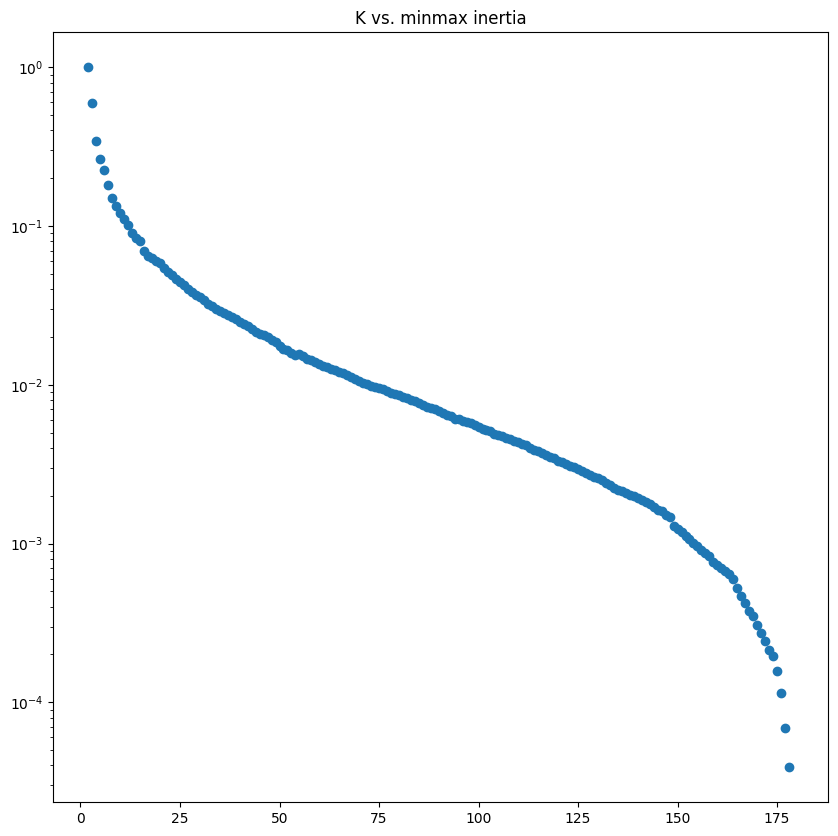

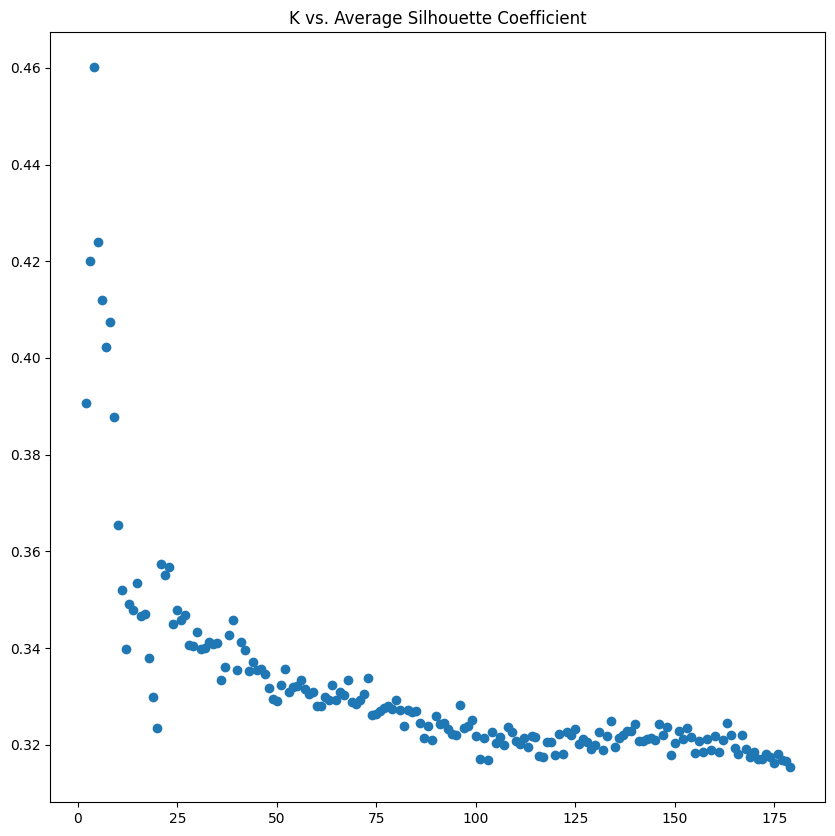

In [ ]:

# ---------- 1.  LOAD DENSITY GRID ----------
data_flat        = np.load("C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/beta_glyph_parameter_buddha_array.npy")    # shape (H, W)
D = data_flat.reshape((5000, 5000))

D = np.genfromtxt('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_matrix_glyph_P1_X-2.5_Y0.0_erad3.95_lim1e+20_zoom1.0.csv', delimiter=',')


#D = pd.read_csv('C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/')

scaler = StandardScaler()
H, W     = D.shape

# --------- 1. load + sparsify -----------

ys, xs   = np.nonzero(D)
w  = D[ys, xs].astype(float)
coords   = np.column_stack([xs, ys]).astype(float)   # pixel coords (x, y)
coords = scaler.fit_transform(coords)


# --------- 2. reservoir-style sampling -----------
# keep ≤ 500k points, but sample proportionally to weight
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels, sample_size=20_000)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
trainingdf = pd.DataFrame(trainingdata)
trainingdf.columns =['K', 'Inertia','Avg Silhouette Coeff']
scalermm = MinMaxScaler()


trainingdf['min_max_inertia'] = scalermm.fit_transform(trainingdf[['Inertia']])
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
plt.yscale('log')
#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.title("K vs. Average Silhouette Coefficient")

#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

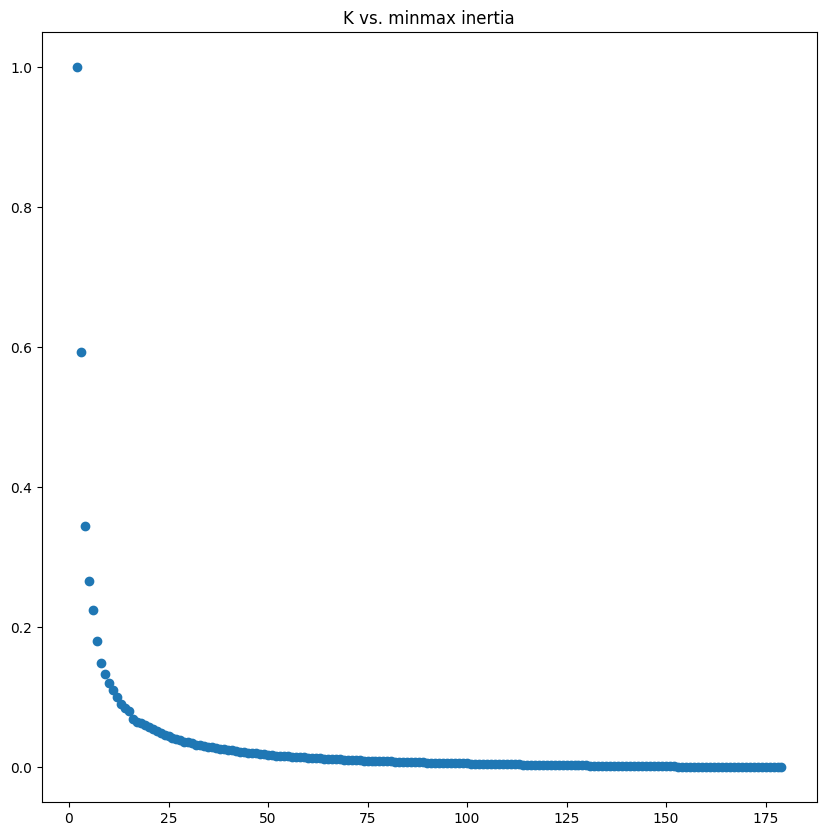

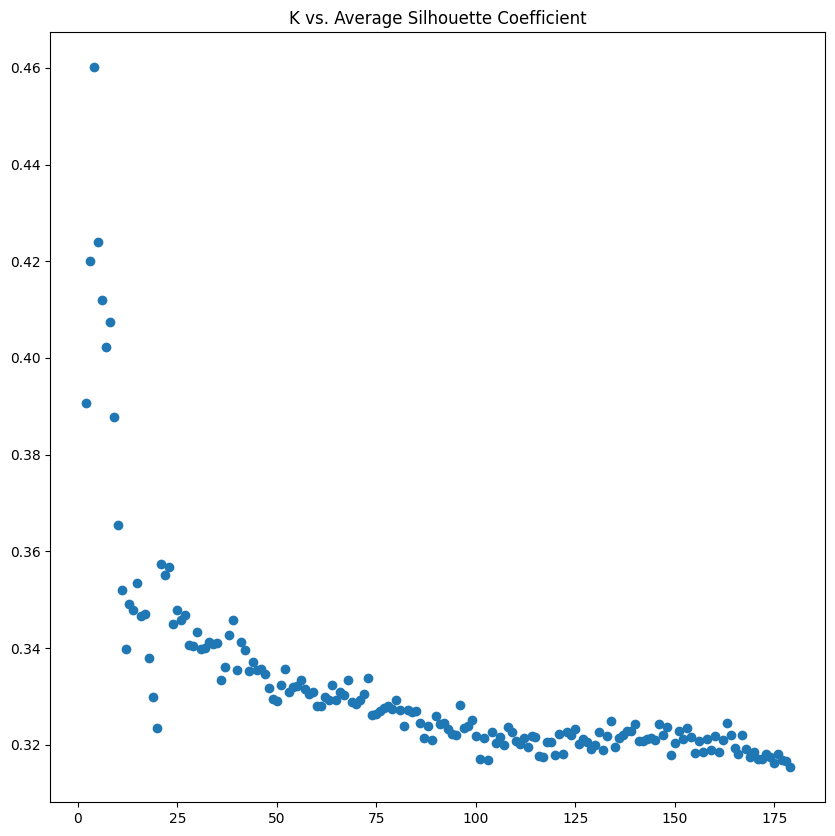

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['min_max_inertia'])
plt.title("K vs. minmax inertia")
#plt.yscale('log')
#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 10))
fig = plt.scatter(x=trainingdf['K'], y = trainingdf['Avg Silhouette Coeff'])
plt.title("K vs. Average Silhouette Coefficient")

#plt.imsave("data/minmaxinertia.png")
plt.show()
plt.close()

In [ ]:
keep   = 1_000_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)

km = KMeans(n_clusters=25,
            n_init='auto',
            max_iter=10000,
            random_state=952380)
km.fit(coords, sample_weight= w)

inertia = km.inertia_
labels = km.fit_predict(coords_sample)

centroids = km.cluster_centers_.astype(int)   # K × 2  (x,y)
np.save('centroids2.npy', centroids)

########
# overlay centroids in image

import numpy as np
from skimage.draw import disk
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids2.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 5                             # 10-pixel diameter → r = 5
img_path2  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/PhylacteryBrot_erad_3.95_neg_sqrt.png'

img_path1  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')

Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png, and mask saved to cluster_mask.npy


In [ ]:

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids2.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 20                             # 10-pixel diameter → r = 5
img_path2  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/PhylacteryBrot_erad_3.95_neg_sqrt.png'

img_path1  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')



Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png, and mask saved to cluster_mask.npy


In [ ]:

# ------------------ USER INPUT ------------------
centroids = np.load('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/centroids2.npy')  # shape (25, 2)  ints (x_pix, y_pix)
radius    = 20                             # 10-pixel diameter → r = 5
img_path2  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/c:\Users\dougm\OneDrive\Pictures\Anun\glyph_P1_X-2.5_Y0.0_erad3.95_lim1e+20_zoom1.0.png'

img_path1  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 73-74: truncated \UXXXXXXXX escape (<ipython-input-88-f8b7fa979c1c>, line 4)

In [ ]:
img_path2  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_P1_X-2.5_Y0.0_erad3.95_lim1e+20_zoom1.0.png'

img_path1  = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_buddhaP10.0_Y0.0_erad3.95_lim1e20.png.png'
out_png   = 'C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png'
# -----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 120                                    # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')




Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png, and mask saved to cluster_mask.npy


In [ ]:
----------------------------------------------

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (0,0,0).astype(np.uint8)
    alpha = 255                                  # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')


SyntaxError: invalid syntax (<ipython-input-90-3fb8787a0667>, line 1)

In [ ]:

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (0,0,0).astype(np.uint8)
    alpha = 255                                  # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')



AttributeError: 'tuple' object has no attribute 'astype'

In [ ]:

# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = [0,0,0].astype(np.uint8)
    alpha = 255                                  # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
# 0) load base image (assumed 5000×5000 PNG)
base_img = Image.open(img_path2).convert('RGBA')
H, W     = base_img.size[1], base_img.size[0]

# 1) prepare mask canvas (uint8, 0 = background)
mask = np.zeros((H, W), dtype=np.uint8)

# 2) paint each centroid as a filled disk
for idx, (x, y) in enumerate(centroids):
    rr, cc = disk((y, x), radius, shape=mask.shape)
    mask[rr, cc] = idx + 1            # avoid 0 so each ID > 0

# --- OPTIONAL: export raw mask for later use ----
np.save('cluster_mask2.npy', mask)

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (colours[idx-1, :3] * 255).astype(np.uint8)
    alpha = 255                                  # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')

Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png, and mask saved to cluster_mask.npy


In [ ]:

# 3) build an RGBA overlay for pretty plotting
colours = plt.cm.tab20(np.linspace(0, 1, len(centroids)))  # 25 distinct hues
palette = plt.cm.Set1(np.linspace(0, 1, len(centroids)))
overlay = np.zeros((H, W, 4), dtype=np.uint8)

for idx in range(1, len(centroids)+1):
    rgb  = (palette[idx-1, :3] * 255).astype(np.uint8)
    alpha = 255                                  # 0 transparent … 255 solid
    overlay[mask == idx] = np.concatenate([rgb, [alpha]])

# 4) composite overlay on top of base
overlay_img = Image.fromarray(overlay, mode='RGBA')
composited  = Image.alpha_composite(base_img, overlay_img)
composited.save(out_png)
print(f'Wrote {out_png}, and mask saved to cluster_mask.npy')



Wrote C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/overlay2.png, and mask saved to cluster_mask.npy


: 

Connected to Python 3.11.9

In [ ]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
import json
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

# ---------- 1.  LOAD DENSITY GRID ----------
data_flat        = np.load("C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/beta_glyph_parameter_buddha_array.npy")    # shape (H, W)
D = data_flat.reshape((5000, 5000))

D = np.genfromtxt('C:/Users/dougm/OneDrive/Documents/code/anun/parameter_plane_clustering/glyph_matrix_glyph_P1_X-2.5_Y0.0_erad3.95_lim1e+20_zoom1.0.csv', delimiter=',')


#D = pd.read_csv('C:/Users/dougm/OneDrive/Documents/code/anun/data/parameter_plane/')

#scaler = StandardScaler()
scaler = RobustScaler()
H, W     = D.shape

# --------- 1. load + sparsify -----------

ys, xs   = np.nonzero(D)
w  = D[ys, xs].astype(float)
coords   = np.column_stack([xs, ys]).astype(float)   # pixel coords (x, y)
coords = scaler.fit_transform(coords)


# --------- 2. reservoir-style sampling -----------
# keep ≤ 500k points, but sample proportionally to weight
keep   = 200_000
p      = (w / w.sum())
idx    = np.random.choice(len(coords), size=keep, replace=False, p=p)
coords_sample = coords[idx]
w_sample      = w[idx]
trainingdata = []
for K in range(180):

    if K < 2:
        continue
    # --------- 3. Mini-batch KMeans -----------
    
    mb = MiniBatchKMeans(
            n_clusters   = K,
            batch_size   = 20_000,
            n_init       = "auto",
            max_iter     = 500,
            random_state = 42
        )
    mb.fit(coords_sample, sample_weight=w_sample)
    print('computing inertia')
    inertia = mb.inertia_
    labels = mb.fit_predict(coords_sample)
    print('computing avg silhouette coefficient')
    # Calculate the average    silhouette coefficient
    avg_silhouette = silhouette_score(coords_sample, labels, sample_size=20_000)
    print(f"Average Silhouette Coefficient: {avg_silhouette:.2f} for k = {K}")
    trainingdata.append([K, inertia, avg_silhouette])
trainingdf = pd.DataFrame(trainingdata)
trainingdf.columns =['K', 'Inertia','Avg Silhouette Coeff']
scalermm = MinMaxScaler()

computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.38 for k = 2
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.42 for k = 3
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.46 for k = 4
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.42 for k = 5
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.39 for k = 6
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.38 for k = 7
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.40 for k = 8
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.39 for k = 9
computing inertia
computing avg silhouette coefficient
Average Silhouette Coefficient: 0.39 for k = 10
computing inertia
computing avg silhouette coefficient
Average Silhouette Coeffic

No kernel connected